In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.ndimage.filters import gaussian_filter

In [3]:
figsize(8, 6)

In [4]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin
d2r = np.pi / 180.

In [5]:
z = np.load('../externaldata/cgps.npz')
dlons = z['lons']
dlats = z['lats']
dsig = z['signal']

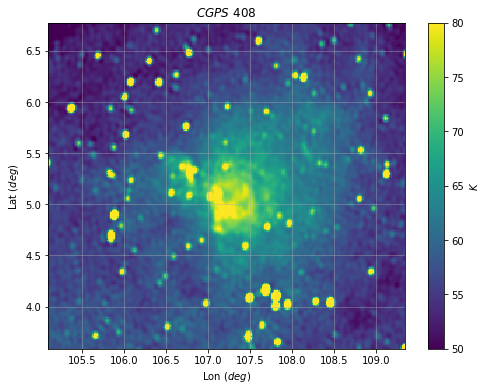

In [17]:
pcolormesh(dlons, dlats, dsig)
clim(50, 80)
cm = colorbar();
xlabel('$\mathrm{Lon}\ (deg)$')
ylabel('$\mathrm{Lat}\ (deg)$')
cm.set_label('$K$')
title('$CGPS\ 408~MHz$')
grid(alpha=0.5)

In [21]:
sigma1 = 60. / 1. / (2. * np.sqrt(2. * np.log(2)))
sigma2 = 60. / 0.75 / (2. * np.sqrt(2. * np.log(2)))

In [29]:
smthsig = gaussian_filter(dsig, [sigma1, sigma2])

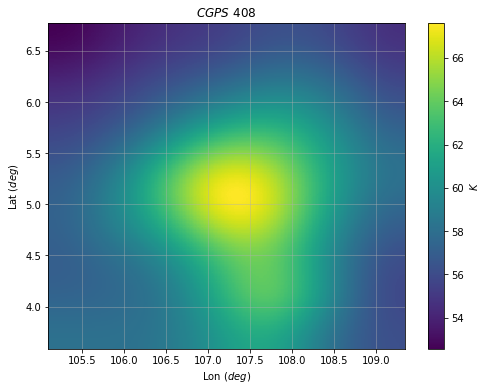

In [30]:
pcolormesh(dlons, dlats, smthsig)
#clim(50, 80)
cm = colorbar();
xlabel('$\mathrm{Lon}\ (deg)$')
ylabel('$\mathrm{Lat}\ (deg)$')
cm.set_label('$K$')
title('$CGPS\ 408~MHz$')
grid(alpha=0.5)

In [13]:
(dlons.max() - dlons.min()) / 256 * 60

0.9960937101562517

In [16]:
(dlats.max() - dlats.min())/256 * 60.

0.74707025273437511

In [34]:
data = smthsig.flatten()
area = (((dlons.max() - dlons.min())/256) * ((dlats.max() - dlats.min())/256)) * d2r * d2r
nu = 408.e6
datajy = data * 2. * kboltz * (nu / clight)**2 * area * 1.e26

In [35]:
lonc = 107.2
latc = 5.2
lonsq = (dlons - lonc)**2
latsq = (dlats - latc)**2
biglon = np.ones((256, 256)) * lonsq
biglat = np.transpose(np.ones((256, 256)) * latsq)
radius = np.sqrt(biglon + biglat).flatten()
annulus = (radius > (80./60.)) * (radius < (100./60.))
adata = np.median(datajy[annulus])

In [36]:
lonc = 107.2
latc = 5.2
lonsq = (dlons - lonc)**2
latsq = (dlats - latc)**2
biglon = np.ones((256, 256)) * lonsq
biglat = np.transpose(np.ones((256, 256)) * latsq)
radius = np.sqrt(biglon + biglat).flatten()
rmask = radius <= 1.
rdata = datajy[rmask]
print np.sum(rdata - adata)

23.5615


In [9]:
lonc = 106.79
latc = 5.3
lonsq = (dlons - lonc)**2
latsq = (dlats - latc)**2
biglon = np.ones((256, 256)) * lonsq
biglat = np.transpose(np.ones((256, 256)) * latsq)
radius = np.sqrt(biglon + biglat).flatten()
rmask = radius <= 0.2
rdata = datajy[rmask]
print np.sum(rdata - adata)

5.419


In [9]:
lonc = 106.79
latc = 5.3
lonsq = (dlons - lonc)**2
latsq = (dlats - latc)**2
biglon = np.ones((256, 256)) * lonsq
biglat = np.transpose(np.ones((256, 256)) * latsq)
radius = np.sqrt(biglon + biglat).flatten()
rmask = radius <= 0.2
rdata = datajy[rmask]
print np.sum(rdata - adata)

5.419


In [10]:
lonc = 107.3
latc = 5.1
lonsq = (dlons - lonc)**2
latsq = (dlats - latc)**2
biglon = np.ones((256, 256)) * lonsq
biglat = np.transpose(np.ones((256, 256)) * latsq)
radius = np.sqrt(biglon + biglat).flatten()
rmask = radius <= 0.4
rdata = datajy[rmask]
print np.sum(rdata - adata)

26.8198


In [8]:
lonc = 107.2
latc = 5.2
lonsq = (dlons - lonc)**2
latsq = (dlats - latc)**2
biglon = np.ones((256, 256)) * lonsq
biglat = np.transpose(np.ones((256, 256)) * latsq)
radius = np.sqrt(biglon + biglat).flatten()
rmask = radius <= 1.
rdata = datajy[rmask]
print np.sum(rdata - adata)

NameError: name 'adata' is not defined